<a href="https://colab.research.google.com/github/AlexGhanem/DataScienceCertif/blob/main/Star_Trek_Analysis_for_fun_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cinemagoer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 5.3 MB/s eta 0:00:00


In [ ]:
from imdb import Cinemagoer

In [ ]:
ia = Cinemagoer()

In [ ]:
star_trek = ia.search_movie('star trek')

In [ ]:
star_trek[0]

<Movie id:8806524[http] title:_"Star Trek: Picard" (2023) (2020)_>

In [ ]:
def get_star_trek_list(keyword='star trek'):
  from imdb import Cinemagoer
  ia = Cinemagoer()
  star_trek = ia.search_movie(keyword)
  ls = []

  for instance in star_trek:
    id = instance.movieID 
    print(instance['title'])
    if (ia.get_movie(id)['kind'] == 'tv series'):
      show = ia.get_movie_episodes(id)
      ls.append(format_result(show))

  return ls

def format_result(show):

  ls = []
  s = 0
  e = 0
  show_list = list(show['data']['episodes'].values())

  for season in show_list:
    season_list = season.values()
    s+=1
    for episode in season_list:
      e+=1
      print(episode['title'])
      try:
        ls.append({'show':episode['series title'],'season':s,'episode_num':e,'episode_title':episode['title'],'rating':episode['rating']})
      except KeyError:
        ls.append({'show':episode['series title'],'season':s,'episode_num':e,'episode_title':episode['title'],'rating':None})

    e = 0

  return ls

In [ ]:
st_list = get_star_trek_list()

Star Trek: Picard
Remembrance
Maps and Legends
The End Is the Beginning
Absolute Candor
Stardust City Rag
The Impossible Box
Nepenthe
Broken Pieces
Et in Arcadia Ego, Part 1
Et in Arcadia Ego, Part 2
The Star Gazer
Penance
Assimilation
Watcher
Fly Me to the Moon
Two of One
Monsters
Mercy
Hide and Seek
Farewell
The Next Generation
Disengage
Seventeen Seconds
No Win Scenario
Imposters
The Bounty
Dominion
Surrender
Võx
The Last Generation
Star Trek
The Cage
The Man Trap
Charlie X
Where No Man Has Gone Before
The Naked Time
The Enemy Within
Mudd's Women
What Are Little Girls Made Of?
Miri
Dagger of the Mind
The Corbomite Maneuver
The Menagerie: Part I
The Menagerie: Part II
The Conscience of the King
Balance of Terror
Shore Leave
The Galileo Seven
The Squire of Gothos
Arena
Tomorrow Is Yesterday
Court Martial
The Return of the Archons
Space Seed
A Taste of Armageddon
This Side of Paradise
The Devil in the Dark
Errand of Mercy
The Alternative Factor
The City on the Edge of Forever
Operation

In [ ]:
import pandas as pd

st_list_copy = [item for sublist in st_list for item in sublist]
st_series_list = pd.DataFrame(st_list_copy)

In [ ]:
st_series_avg = st_series_list[['show','season','rating']].groupby(['show','season']).agg('mean').reset_index().dropna()

In [ ]:
st_series_avg['show']=st_series_avg['show'].str.strip()

In [ ]:
st_series_avg['show'].str.replace('Star Trek (TV Series 1966–1969) - IMDb','Star Trek: The Original Series (TV Series 1966–1969)')
# st_series_avg['show'].str.replace('Star Trek', '').str.split(':')

<ipython-input-11-fb36f16c3719>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  st_series_avg['show'].str.replace('Star Trek (TV Series 1966–1969) - IMDb','Star Trek: The Original Series (TV Series 1966–1969)')


0                Star Trek (TV Series 1966–1969) - IMDb
1                Star Trek (TV Series 1966–1969) - IMDb
2                Star Trek (TV Series 1966–1969) - IMDb
3     Star Trek: Deep Space Nine (TV Series 1993–199...
4     Star Trek: Deep Space Nine (TV Series 1993–199...
5     Star Trek: Deep Space Nine (TV Series 1993–199...
6     Star Trek: Deep Space Nine (TV Series 1993–199...
7     Star Trek: Deep Space Nine (TV Series 1993–199...
8     Star Trek: Deep Space Nine (TV Series 1993–199...
9     Star Trek: Deep Space Nine (TV Series 1993–199...
10    Star Trek: Discovery (TV Series 2017–2024) - IMDb
11    Star Trek: Discovery (TV Series 2017–2024) - IMDb
12    Star Trek: Discovery (TV Series 2017–2024) - IMDb
13    Star Trek: Discovery (TV Series 2017–2024) - IMDb
15    Star Trek: Enterprise (TV Series 2001–2005) - ...
16    Star Trek: Enterprise (TV Series 2001–2005) - ...
17    Star Trek: Enterprise (TV Series 2001–2005) - ...
18    Star Trek: Enterprise (TV Series 2001–2005

In [ ]:
st_series_avg['show']=st_series_avg['show'].str.split('-').apply(lambda x: x[0]).apply(lambda x: x[x.find(':')+1:x.find('(')])

In [ ]:
st_series_avg['show']=st_series_avg['show'].str.strip()

In [ ]:
def imdb_rating(x):
   if (x > 8.2 and x <= 10): 
      rank = 'Top 20%'
   elif (x > 7.7 and x <= 8.2): 
      rank = '60-80%'
   elif (x > 7.3 and x <= 7.7):
      rank = 'Middle 20%'
   elif (x > 6.7 and x <= 7.3):
      rank = '20-40%'
   elif (x <= 6.7):
      rank = 'Bottom 20%'
   return rank

In [ ]:
st_series_avg['rank'] = st_series_avg['rating'].apply(imdb_rating)

<Axes: ylabel='Frequency'>

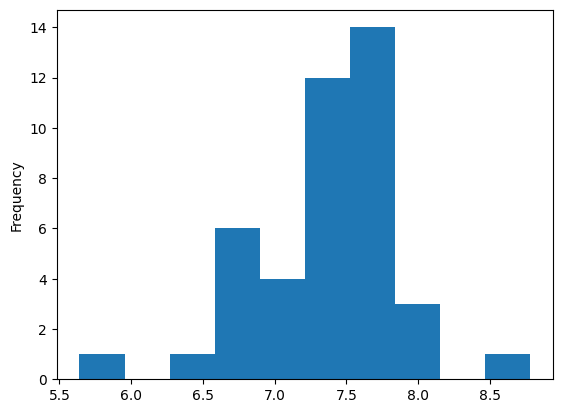

In [ ]:
st_series_avg['rating'].plot.hist()

In [ ]:
from dateutil.relativedelta import relativedelta
import datetime

st_series_avg['date'] = st_series_avg['season'].apply(lambda x: relativedelta(years = x) + datetime.datetime(2000,1,1))
st_series_avg['end'] = st_series_avg['date'] + pd.Timedelta(300,'d')

In [ ]:
st_series_avg['transform'] = st_series_avg['rank'].map(
        {
            'Bottom 20%':0,
            '20-40%':1,
            'Middle 20%':2,
            '60-80%':3,
            'Top 20%':4
        }
      )


st_series_avg_plot = st_series_avg.sort_values('transform',ascending=False)

In [ ]:
import plotly.express as px


ticktext = [str(x) for x in (range(st_series_avg['season'].min(), st_series_avg['season'].max()+1))]
tickvals = list(range(st_series_avg['season'].min(), st_series_avg['season'].max()+1))

fig = px.timeline(
    st_series_avg_plot.replace('Star Trek','The Original Series')
    , x_start="date", x_end="end", y="show", color="rank"
    , labels={'rank':'IMDB Rank'}
    , color_discrete_map={
        'Bottom 20%':'#1d3557',
        '20-40%':'#457b9d',
        'Middle 20%':'#a8dadc',
        '60-80%':'#ee9b00',
        'Top 20%':'#e63946'
        }
    , title='Star Trek Series Season Average by IMDB Rank'
    )
fig.update_layout(
    xaxis_tickformat = '%y',
    xaxis_title='<b>season<b>', 
    yaxis_title=None,
    template="plotly_white",
    font_size=25,
    width= 1400,
    height=1400
  )

fig.update_xaxes(linecolor="rgba(0,0,0,0)",showgrid=False)
fig.update_yaxes(linecolor="rgba(0,0,0,0)")

fig

In [ ]:
qnew_st_series = st_series_avg_plot.pivot(index ='show',columns='season')['rating']
new_st_series

season,1,2,3,4,5,6,7
show,,,,,,,
Deep Space Nine,6.964392,7.320465,7.420465,7.657235,7.620465,7.601235,7.633235
Discovery,7.487901,7.415520,6.632004,5.639696,NaN,NaN,NaN
Enterprise,7.262773,7.362773,7.663735,7.719416,NaN,NaN,NaN
Lower Decks,7.471235,7.831235,7.841235,NaN,NaN,NaN,NaN
Picard,7.561235,6.601235,8.781235,NaN,NaN,NaN,NaN
Prodigy,7.921235,NaN,NaN,NaN,NaN,NaN,NaN
Strange New Worlds,7.861235,NaN,NaN,NaN,NaN,NaN,NaN
The Animated Series,6.607485,6.534568,NaN,NaN,NaN,NaN,NaN
The Next Generation,6.757235,6.873962,7.535850,7.543542,7.601235,7.678158,7.177235
